In [2]:
# Librosa.

# pip install librosa 
# pip install scikit-learn
# pip install scipy


import librosa
import librosa.display

# Plotting and numeric libraries.
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate a sound

# framerate = 44100 # Hz
# t = np.linspace(0,5,framerate*5)
# data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
# IPython.display.Audio(data=None, filename=None, url=None, embed=None, rate=None, autoplay=False) # описание функции
# ipd.Audio(data, rate=framerate)

In [56]:
framerate = 44100 # Hz

song = ipd.Audio(url = 'https://ccrma.stanford.edu/workshops/mir2014/audio/125BOUNC-mono.WAV', rate = framerate)

# lib 'https://ccrma.stanford.edu/workshops/mir2014/audio/'

song

In [100]:
# загрузка аудиофайла

import soundfile as sf
import io

from six.moves.urllib.request import urlopen

url = "https://ccrma.stanford.edu/workshops/mir2014/audio/125BOUNC-mono.WAV"

data, sr = sf.read(io.BytesIO(urlopen(url).read()))

print ( data . shape ) 
print ( sr )

# local_data = 'путь к файлу'
# data ,  sr  =  librosa . load ( local_data ) # для локальной загрузки аудиофайла

(338688,)
44100


In [ ]:
# сохранить файл в локальном каталоге
# librosa.output.write_wav('путь/имя.wav', data, sr)

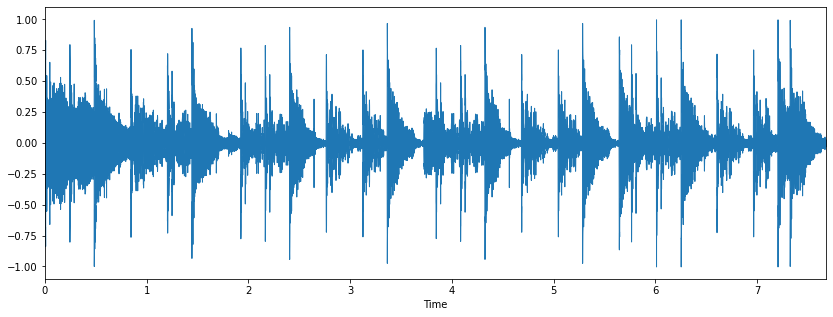

In [78]:
plt.figure(figsize= (14, 5))
librosa.display.waveplot(data, sr = sr)
plt.show()

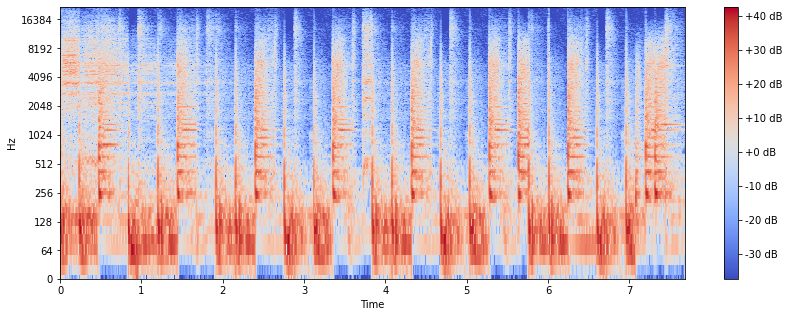

In [74]:
X = librosa.stft(data) # преобразует данные в кратковременное преобразование Фурье
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))

# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log') # преобразовать ось частот в логарифмическую

plt.colorbar(format='%+02.0f dB')
plt.show()

# Извлечение признаков

### Спектральные (частотные) признаки получаются путем преобразования временного сигнала в частотную область с помощью преобразования Фурье. К ним относятся частота основного тона, частотные компоненты, спектральный центроид, спектральный поток, спектральная плотность, спектральный спад и т.д.

# Спектральный центроид

### Указывает, на какой частоте сосредоточена энергия спектра или, другими словами, указывает, где расположен “центр масс” для звука. Схож со средневзвешенным значением: 
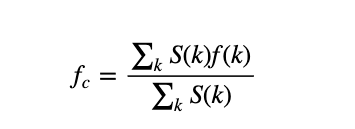
### где S(k) — спектральная величина элемента разрешения k, а f(k) — частота элемента k.
librosa.feature.spectral_centroid вычисляет спектральный центроид для каждого фрейма в сигнале:

(662,)


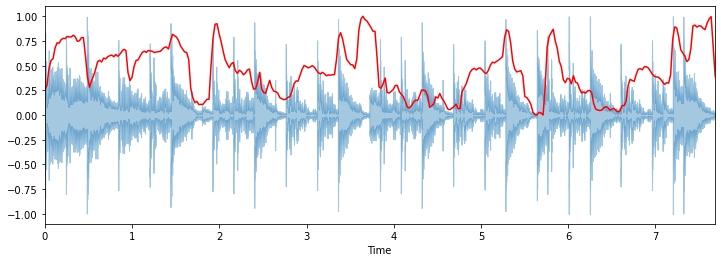

In [96]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0] # возвращает массив со столбцами, равными количеству фреймов, представленных в семпле
print(spectral_centroids.shape)

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
# print(frames)
t = librosa.frames_to_time(frames)

# Нормализация спектрального центроида для визуализации
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# print(t)

# Построение спектрального центроида вместе с формой волны
librosa.display.waveplot(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

# Спектральный спад
### Это мера формы сигнала, представляющая собой частоту, в которой высокие частоты снижаются до 0. Чтобы получить ее, нужно рассчитать долю элементов в спектре мощности, где 85% ее мощности находится на более низких частотах.
librosa.feature.spectral_rolloff вычисляет частоту спада для каждого фрейма в сигнале:

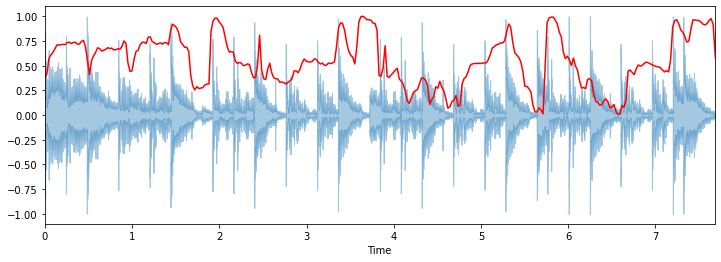

In [92]:
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

# Спектральная ширина
### Спектральная ширина определяется как ширина полосы света на половине максимальной точки (или полная ширина на половине максимума [FWHM]) и представлена двумя вертикальными красными линиями и λSB на оси длин волн.
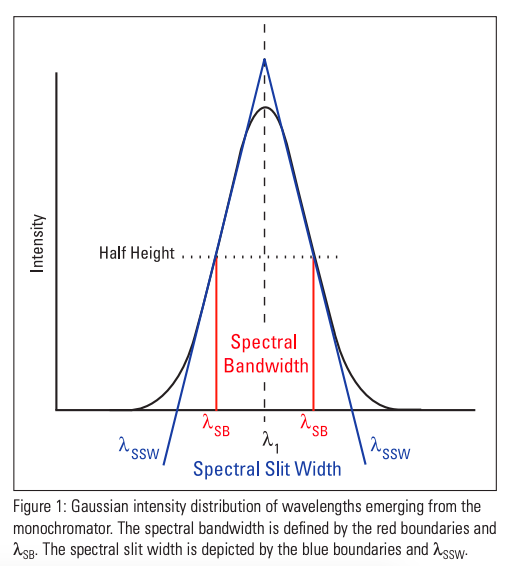
librosa.feature.spectral_bandwidth вычисляет спектральную ширину порядка p:

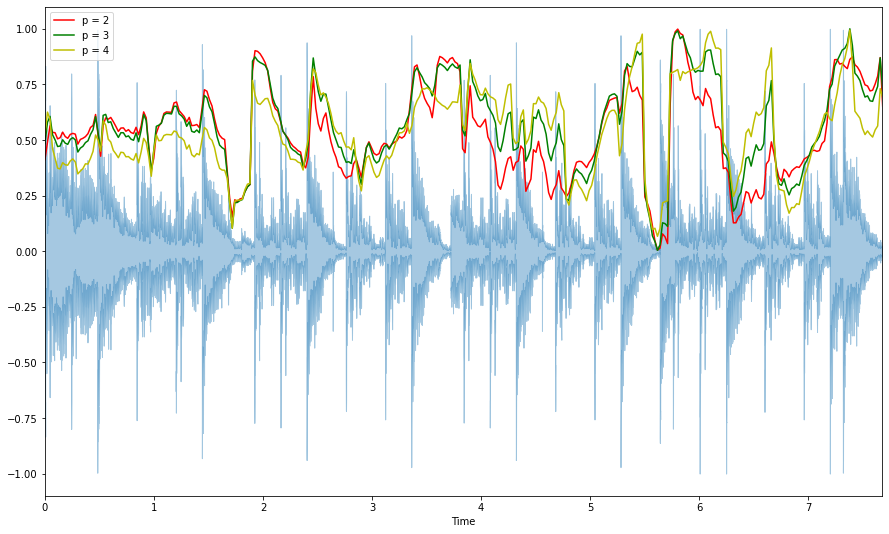

In [98]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))
plt.show()

# Скорость пересечения нуля
### Простой способ измерения гладкости сигнала — вычисление числа пересечений нуля в пределах сегмента этого сигнала. Голосовой сигнал колеблется медленно. Например, сигнал 100 Гц будет пересекать ноль 100 раз в секунду, тогда как “немой” фрикативный сигнал может иметь 3000 пересечений нуля в секунду.
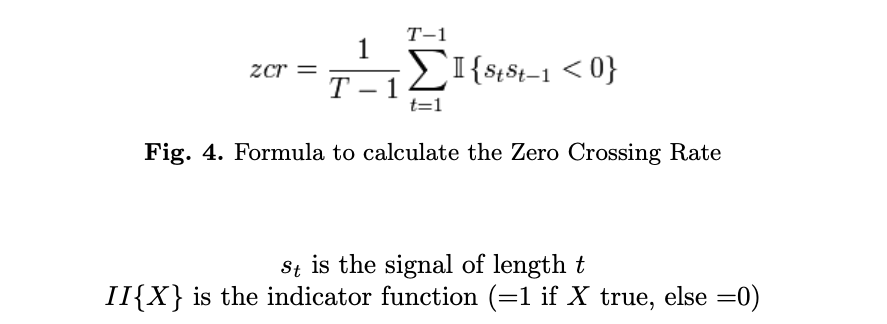
### Более высокие значения наблюдаются в таких высоко ударных звуках, как в металле и роке. Теперь визуализируем этот процесс и рассмотрим вычисление скорости пересечения нуля.

Пересечение нулевой линии на выбранном участке:  25


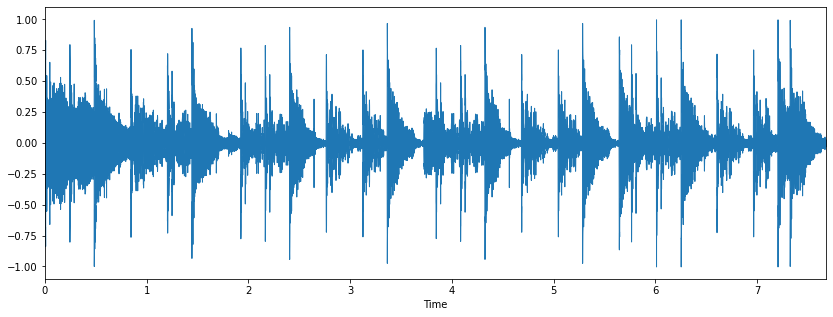

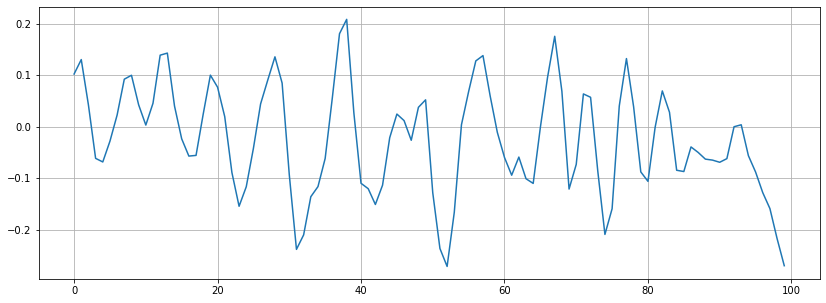

In [107]:
# Построение графика сигнала:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sr)

# Увеличение масштаба:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print('Пересечение нулевой линии на выбранном участке: ', sum(zero_crossings))

# Мел-частотные кепстральные коэффициенты (MFCC)
### Представляют собой небольшой набор признаков (обычно около 10–20), которые кратко описывают общую форму спектральной огибающей. Они моделируют характеристики человеческого голоса.

(20, 662)


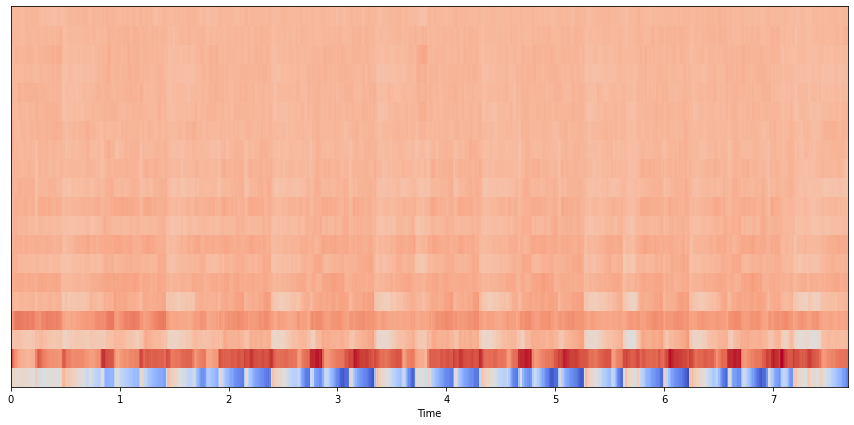

In [110]:
mfccs = librosa.feature.mfcc(data, sr=sr)
print(mfccs.shape)
(20, 97)
# Отображение MFCC:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

# Цветность
### Признак или вектор цветности обычно представлен вектором признаков из 12 элементов, в котором указано количество энергии каждого высотного класса {C, C#, D, D#, E, …, B} в сигнале. Используется для описания меры сходства между музыкальными произведениями.
librosa.feature.chroma_stft используется для вычисления признаков цветности.

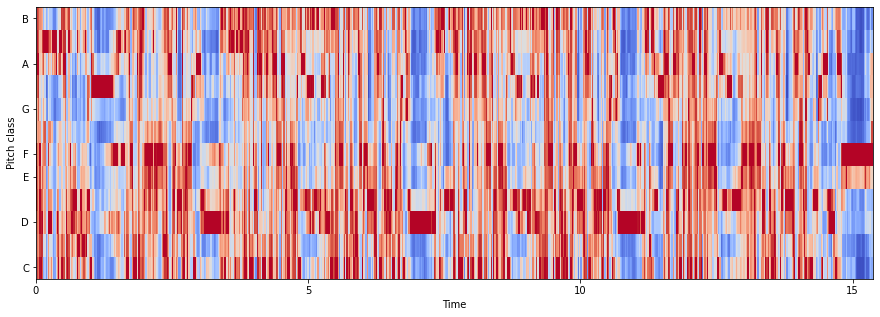

In [115]:
chromagram = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma',  cmap='coolwarm')
# hop_length
plt.show()